In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_initial = pd.read_csv("train_0OECtn8.csv")
test_initial = pd.read_csv("test_1zqHu22.csv")

In [5]:
train_initial.shape,test_initial.shape

((89197, 10), (11121, 9))

In [6]:
#ratio of null values
train_initial.isnull().sum()/train_initial.shape[0] *100

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In [7]:
train_initial.describe(include='all')

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197,89197,89197.000000,89197.000000,89197.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,52397,44638,NaN,NaN,NaN
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,NaN,NaN,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,NaN,NaN,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,NaN,NaN,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,NaN,NaN,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,NaN,NaN,280.000000,714.000000,4.150000


In [8]:
train_initial.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [9]:
train = train_initial.copy()
test = test_initial.copy()

In [10]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [11]:
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i].astype(str))

In [12]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,1,1,180,1000,4.33
1,2,5304,32,132,14,0,1,330,714,1.79
2,3,1840,12,24,19,1,1,180,138,4.35
3,4,12597,23,112,19,1,1,220,613,3.77
4,5,13626,23,112,27,1,2,220,613,3.13


In [13]:
le = LabelEncoder()
var_mod = test.select_dtypes(include='object').columns
for i in var_mod:
    test[i] = le.fit_transform(test[i].astype(str))

In [14]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,1,1,180,138
1,89199,11278,34,115,14,1,1,230,840
2,89200,17245,8,110,44,0,2,280,628
3,89201,9851,16,137,18,1,1,270,462
4,89202,16008,34,96,47,0,0,230,840


In [31]:
test_inputs = test.drop(['row_id'],axis =1)
test_inputs.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
0,7986,12,42,14,1,1,180,138
1,11278,34,115,14,1,1,230,840
2,17245,8,110,44,0,2,280,628
3,9851,16,137,18,1,1,270,462
4,16008,34,96,47,0,0,230,840


In [15]:
# The target(s) 
targets = train['engagement_score']

# The inputs 
inputs = train.drop(['row_id','engagement_score'],axis=1)

In [16]:
inputs

,user_id,category_id,video_id,age,gender,profession,followers,views
0,19990,37,128,24,1,1,180,1000
1,5304,32,132,14,0,1,330,714
2,1840,12,24,19,1,1,180,138
3,12597,23,112,19,1,1,220,613
4,13626,23,112,27,1,2,220,613
...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,1,0,340,662
89193,20466,20,47,31,1,0,240,892
89194,13655,16,97,25,1,1,270,462
89195,24840,9,18,35,1,2,230,819


In [17]:
from  sklearn import preprocessing
from sklearn.model_selection  import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [19]:
scaled_inputs_train = preprocessing.scale(X_train)
scaled_inputs_val = preprocessing.scale(X_test)

In [32]:
scaled_inputs_test = preprocessing.scale(test_inputs)

In [20]:
scaled_inputs_train.shape

(71357, 8)

In [33]:
scaled_inputs_test.shape

(11121, 8)

In [21]:
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(10,activation='relu'),
  tf.keras.layers.Dense(1,activation='linear')
])



In [24]:
# Compile the model
model.compile(loss='mse',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae','mse'])



In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model

history = model.fit(scaled_inputs_train, # train inputs
          y_train, # train targets
          batch_size=100, # batch size
          epochs=25, # epochs that we will train for (assuming early stopping doesn't kick in)
        
          # task here is to check if val_loss is increasing
          #callbacks=[early_stopping], # early stopping
          validation_data=(scaled_inputs_val, y_test), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/25
714/714 - 2s - loss: 0.4874 - mae: 0.5262 - mse: 0.4874 - val_loss: 0.5027 - val_mae: 0.5326 - val_mse: 0.5027 - 2s/epoch - 3ms/step
Epoch 2/25
714/714 - 2s - loss: 0.4869 - mae: 0.5258 - mse: 0.4869 - val_loss: 0.4970 - val_mae: 0.5284 - val_mse: 0.4970 - 2s/epoch - 3ms/step
Epoch 3/25
714/714 - 2s - loss: 0.4873 - mae: 0.5261 - mse: 0.4873 - val_loss: 0.4922 - val_mae: 0.5254 - val_mse: 0.4922 - 2s/epoch - 2ms/step
Epoch 4/25
714/714 - 2s - loss: 0.4869 - mae: 0.5255 - mse: 0.4869 - val_loss: 0.4962 - val_mae: 0.5333 - val_mse: 0.4962 - 2s/epoch - 2ms/step
Epoch 5/25
714/714 - 2s - loss: 0.4870 - mae: 0.5256 - mse: 0.4870 - val_loss: 0.4909 - val_mae: 0.5323 - val_mse: 0.4909 - 2s/epoch - 3ms/step
Epoch 6/25
714/714 - 2s - loss: 0.4868 - mae: 0.5257 - mse: 0.4868 - val_loss: 0.4925 - val_mae: 0.5334 - val_mse: 0.4925 - 2s/epoch - 2ms/step
Epoch 7/25
714/714 - 2s - loss: 0.4871 - mae: 0.5256 - mse: 0.4871 - val_loss: 0.4930 - val_mae: 0.5284 - val_mse: 0.4930 - 2s/epoch - 2

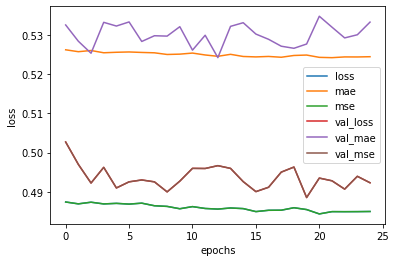

In [30]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [39]:
ypred = model.predict(scaled_inputs_val)
ypred

array([[3.1676767],
       [3.214228 ],
       [2.9997847],
       ...,
       [3.5003803],
       [2.5833437],
       [4.1541524]], dtype=float32)

In [36]:
from sklearn import metrics

In [40]:
r2score = metrics.r2_score(y_test,ypred)

In [41]:
r2score

0.3484028075185769

In [37]:
model_predictions = model.predict(scaled_inputs_test)
model_predictions

array([[4.0836773],
       [3.589139 ],
       [2.5758023],
       ...,
       [3.8372128],
       [3.7598555],
       [3.1698723]], dtype=float32)

In [38]:
model.evaluate(scaled_inputs_test,model_predictions)

348/348 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0, 0.0]

In [42]:
submission_now = pd.read_csv('test_1zqHu22.csv')

submission_now['engagement_score'] = model_predictions


In [43]:
submission_now.to_csv('my_submission.csv', index=False)